## Importando as biblitecas

In [0]:
# Só irei usar pandas para manipular os dados e matplotlib para visualizar as etapas.
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('/Volumes/workspace/default/datasets/documento_testeregressaolinear.csv', delimiter=';')

In [0]:
df.head()  #Pedi para o Gemini criar um dataset simples com alguma correlação para esse estudo

,Gasto com Publicidade (R$),Vendas (unidades)
0,100,250
1,150,320
2,200,400
3,250,480
4,300,550


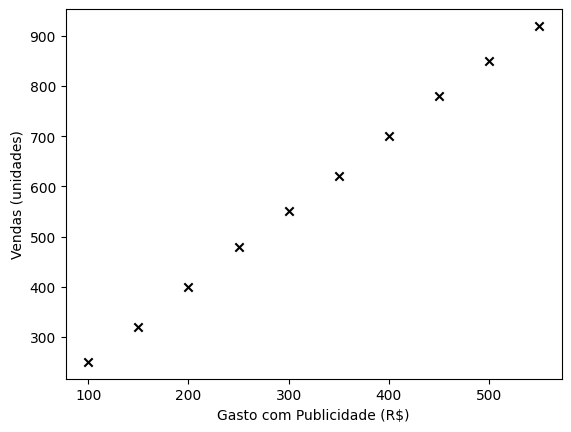

In [0]:
# Visualizando os dados e sua relação antes de começar o algoritmo

plt.scatter(df['Gasto com Publicidade (R$)'], df['Vendas (unidades)'], color = 'black', marker= 'x')
plt.xlabel('Gasto com Publicidade (R$)')
plt.ylabel('Vendas (unidades)')
plt.show()

Agora faremos uma implementação da função loss, 
que no caso da regressão linear é o Mean Squared Error.

[Link para formula](https://lh6.googleusercontent.com/qaK5gUO0DRYPaNqKapwyvH8pFpXqfoC30F9X8nvgWH8oPnyqs8-jviqpBHe5Lof2EDZmiRh2fvDQEfsRZ60kuRHAW7najy5d5JvOCWQ2kDjk8nOLkw6Re0qZaI9hBM6WUmqruOUrRi5b3N3Sig)

In [0]:
def funcao_loss(w,b,pontos):
    total_error = 0
    for i in range(len(pontos)):      
        x = pontos.iloc[i][x]         
        y = pontos.iloc[i][y]         
        total_error = total_error + ((w*x + b) - y)**2  
    return total_error / float(len(pontos))


In [0]:
def gradient_descent(w_agora, b_agora, pontos, L):
    w_derivado = 0
    b_derivado = 0

    N = len(pontos)

    for i in range(N):
        x = pontos.iloc[i]['Gasto com Publicidade (R$)']
        y = pontos.iloc[i]['Vendas (unidades)']
        
        w_derivado += (1/N) * x * ((w_agora * x + b_agora )- y)
        b_derivado += (1/N)  * ((w_agora * x + b_agora) - y) 

    w = w_agora - L * w_derivado
    b = b_agora - L * b_derivado

    return w, b

In [0]:
w = 0
b = 0
L = 0.00001

epocas = 150

for i in range(epocas):
    if i % 10 == 0:
        print(f"Epoca: {i}")
    w, b  = gradient_descent(w, b, df, L)

print(w, b)

Epoca: 0
Epoca: 10
Epoca: 20
Epoca: 30
Epoca: 40
Epoca: 50
Epoca: 60
Epoca: 70
Epoca: 80
Epoca: 90
Epoca: 100
Epoca: 110
Epoca: 120
Epoca: 130
Epoca: 140
1.7559654191222207 0.0289469251834242


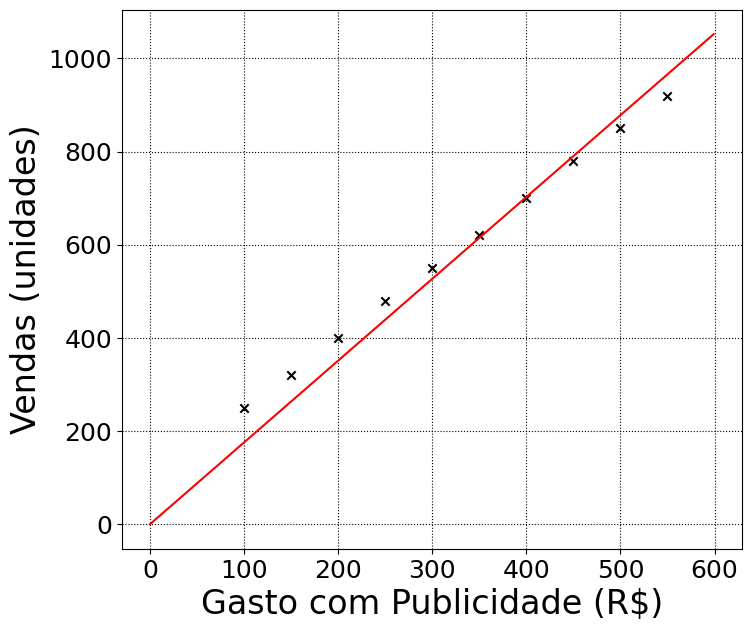

In [0]:
fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize = (8,7));

ax.scatter(df['Gasto com Publicidade (R$)'], df['Vendas (unidades)'], color = 'black', marker= 'x')
ax.plot(list(range(0, 600)), [w*x + b for x in range(0, 600)], color = 'red')
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize=18)
ax.set_xlabel('Gasto com Publicidade (R$)', fontsize = 24)
ax.set_ylabel('Vendas (unidades)', fontsize = 24)
plt.show()